## 02. Import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# folder shortcut
path = r'/Users/yukbuinnemtat/Desktop/Task 6 Folder'

In [5]:
citi_b = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'df_selected_clean.csv'), index_col = False)

In [6]:
citi_b.head()

,Unnamed: 0,weekday,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08


## 03. Clean your data so that it’s ready for analysis.

In [7]:
# Rename 'old_column_name' to 'new_column_name'
citi_b = citi_b.rename(columns={'weekday': 'days_of_the_week'})

In [8]:
# drop unnecessary column
citi_b = citi_b.drop(columns=['Unnamed: 0'])

In [9]:
citi_b.head()

,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08


In [10]:
# Convert 'start_of_ride' to datetime if it's not already in that format
citi_b['start_of_ride'] = pd.to_datetime(citi_b['start_of_ride'])

# Separate 'start_of_ride' into 'start_date' and 'start_hour' columns
citi_b['start_date'] = citi_b['start_of_ride'].dt.date
citi_b['start_hour'] = citi_b['start_of_ride'].dt.hour

# Display the updated DataFrame
print(citi_b[['start_of_ride', 'start_date', 'start_hour']])

            start_of_ride  start_date  start_hour
0     2013-09-09 18:18:55  2013-09-09          18
1     2013-09-12 18:38:53  2013-09-12          18
2     2013-09-18 19:44:04  2013-09-18          19
3     2013-09-28 11:54:37  2013-09-28          11
4     2013-09-27 22:01:01  2013-09-27          22
...                   ...         ...         ...
42988 2013-09-28 15:30:14  2013-09-28          15
42989 2013-09-01 16:27:11  2013-09-01          16
42990 2013-09-14 17:32:26  2013-09-14          17
42991 2013-09-07 18:08:21  2013-09-07          18
42992 2013-09-23 21:54:36  2013-09-23          21

[42993 rows x 3 columns]


In [11]:
# Convert 'start_of_ride' to datetime if it's not already in that format
citi_b['end_of_ride'] = pd.to_datetime(citi_b['end_of_ride'])

# Separate 'start_of_ride' into 'start_date' and 'start_hour' columns
citi_b['end_date'] = citi_b['end_of_ride'].dt.date
citi_b['end_hour'] = citi_b['end_of_ride'].dt.hour

# Display the updated DataFrame
print(citi_b[['end_of_ride', 'end_date', 'end_hour']])

              end_of_ride    end_date  end_hour
0     2013-09-09 18:35:28  2013-09-09        18
1     2013-09-12 18:48:34  2013-09-12        18
2     2013-09-18 19:50:05  2013-09-18        19
3     2013-09-28 12:03:58  2013-09-28        12
4     2013-09-27 22:08:08  2013-09-27        22
...                   ...         ...       ...
42988 2013-09-28 15:46:29  2013-09-28        15
42989 2013-09-01 16:52:52  2013-09-01        16
42990 2013-09-14 17:52:17  2013-09-14        17
42991 2013-09-07 18:25:51  2013-09-07        18
42992 2013-09-23 22:00:46  2013-09-23        22

[42993 rows x 3 columns]


In [12]:
citi_b.head()

,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,start_date,end_date,end_hour
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09 18:18:55,2013-09-09 18:35:28,2013-09-09,2013-09-09,18
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12 18:38:53,2013-09-12 18:48:34,2013-09-12,2013-09-12,18
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18 19:44:04,2013-09-18 19:50:05,2013-09-18,2013-09-18,19
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28 11:54:37,2013-09-28 12:03:58,2013-09-28,2013-09-28,12
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27 22:01:01,2013-09-27 22:08:08,2013-09-27,2013-09-27,22


In [13]:
# drop unnecessary column
citi_b = citi_b.drop(columns=['start_of_ride'])

In [14]:
# drop unnecessary column
citi_b = citi_b.drop(columns=['end_of_ride'])

In [15]:
citi_b.head()

,days_of_the_week,start_hour,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_date,end_date,end_hour
0,Mon,18,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,2013-09-09,2013-09-09,18
1,Thu,18,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,2013-09-12,2013-09-12,18
2,Wed,19,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,2013-09-18,2013-09-18,19
3,Sat,11,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,2013-09-28,2013-09-28,12
4,Fri,22,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,2013-09-27,2013-09-27,22


In [16]:
# Calculate the average start_hour
average_start_hour = citi_b['start_hour'].mean()

# Print the average start_hour
print(f"Average Start Hour: {average_start_hour:.2f}")

Average Start Hour: 14.09


In [17]:
# Calculate the average end_hour
average_end_hour = citi_b['end_hour'].mean()

# Print the average end_hour
print(f"Average End Hour: {average_end_hour:.2f}")

Average End Hour: 14.23


In [18]:
citi_b.describe()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,40.734477,-73.990948,40.734070,-73.991242,770.502105,1975.674459,14.227339
std,4.932889,0.019598,0.012367,0.019603,0.012375,523.444233,10.938735,4.976910
min,0.000000,40.680342,-74.017134,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,40.721101,-74.000040,40.720828,-74.000271,395.000000,1968.000000,10.000000
50%,15.000000,40.736245,-73.990765,40.735877,-73.990985,621.000000,1978.000000,15.000000
75%,18.000000,40.749718,-73.981948,40.749013,-73.982578,999.000000,1984.000000,18.000000
max,23.000000,40.770513,-73.950048,40.770513,-73.950048,2697.000000,1997.000000,23.000000


## 04. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

/var/folders/0t/gxfdtndd2xn40qsj951m42n80000gn/T/ipykernel_54521/1264776123.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi_b['trip_duration'], kde=False, bins=30, hist_kws={'edgecolor': 'black'})


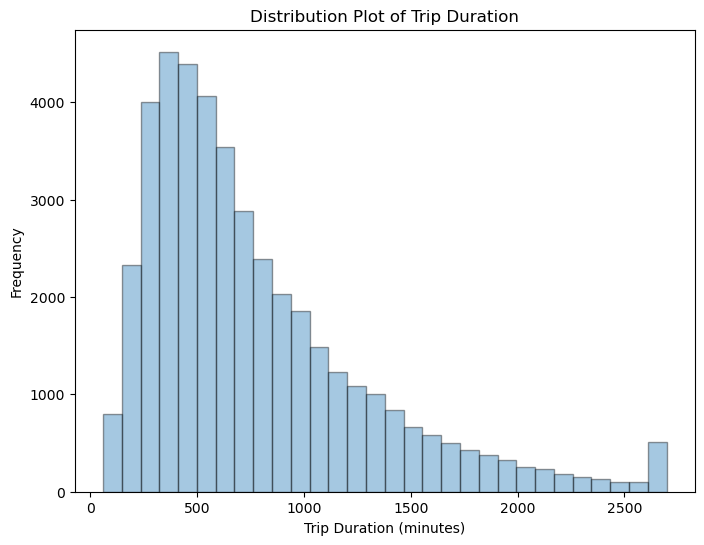

In [19]:
# show extreme values

# Create a distribution plot (distplot) for the 'trip_duration' column
plt.figure(figsize=(8, 6))
sns.distplot(citi_b['trip_duration'], kde=False, bins=30, hist_kws={'edgecolor': 'black'})
plt.title('Distribution Plot of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Define data types for specific columns
data_types = {
    'start_date': 'datetime64[ns]'}  # Assuming you want datetime data type
# Use the 'astype' method to apply the data types to the DataFrame
citi_b = citi_b.astype(data_types)

In [21]:
parse_dates = ['start_date'], ['ride_count'], ['days_of_the_week']

In [22]:
# Convert 'start_hour' to string and add a space character
citi_b['start_hour'] = ' ' + citi_b['start_hour'].astype(str)

In [23]:
# calculate amount of rides taken on each hour of each day

# Convert 'start_date' to datetime if it's not already
citi_b['start_date'] = pd.to_datetime(citi_b['start_date'])

# Assuming 'start_hour' is in a format like '10:00 AM' or '10:00 PM'
# You can add a space to match the format: '10:00 AM' -> ' 10:00 AM'
citi_b['start_hour'] = ' ' + citi_b['start_hour']

# Strip any leading/trailing whitespaces from 'start_hour' column
citi_b['start_hour'] = citi_b['start_hour'].str.strip()

# Add ':00' to hours without specific minutes
citi_b['start_hour'] = citi_b['start_hour'].apply(lambda x: x + ':00' if ':' not in x else x)

# Combine 'start_date' and 'start_hour' columns to create a new datetime column
citi_b['start_time'] = pd.to_datetime(citi_b['start_date'].dt.strftime('%Y-%m-%d') + ' ' + citi_b['start_hour'], format='%Y-%m-%d %H:%M')

# Group by 'start_time' and count the number of rides for each hour of each day
hourly_counts = citi_b.groupby('start_time').size().reset_index(name='ride_count')

# Now, 'hourly_counts' contains the number of rides taken on each hour of each day
print(hourly_counts)

             start_time  ride_count
0   2013-09-01 00:00:00          15
1   2013-09-01 01:00:00          12
2   2013-09-01 02:00:00           9
3   2013-09-01 03:00:00           2
4   2013-09-01 04:00:00           3
..                  ...         ...
706 2013-09-30 19:00:00         140
707 2013-09-30 20:00:00          78
708 2013-09-30 21:00:00          43
709 2013-09-30 22:00:00          40
710 2013-09-30 23:00:00          17

[711 rows x 2 columns]


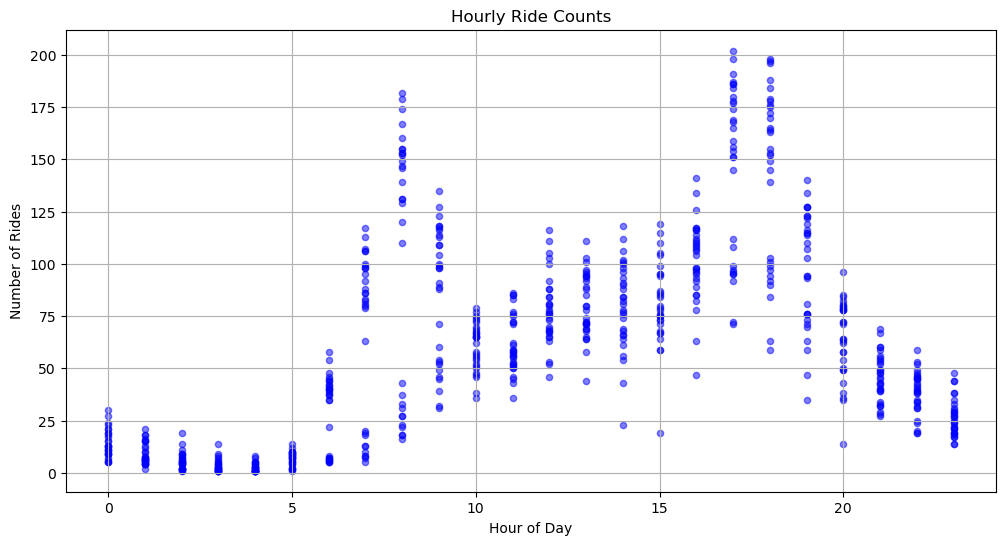

In [24]:
# Extract the hours and ride counts
hours = hourly_counts['start_time'].dt.hour
ride_counts = hourly_counts['ride_count']

# Create the scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(hours, ride_counts, s=20, alpha=0.5, color='blue')
plt.title('Hourly Ride Counts')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()

In [25]:
# Group by the hour of 'start_time' and calculate the mean ride count
hourly_average = hourly_counts.groupby(hourly_counts['start_time'].dt.hour)['ride_count'].mean()

# Display the average rides per hour
print(hourly_average)

start_time
0      14.000000
1       8.866667
2       5.586207
3       3.692308
4       2.777778
5       6.724138
6      29.633333
7      66.000000
8     104.233333
9      86.600000
10     60.900000
11     61.366667
12     78.433333
13     80.266667
14     80.033333
15     81.200000
16    101.533333
17    146.600000
18    142.666667
19     97.666667
20     64.400000
21     45.700000
22     38.633333
23     26.766667
Name: ride_count, dtype: float64


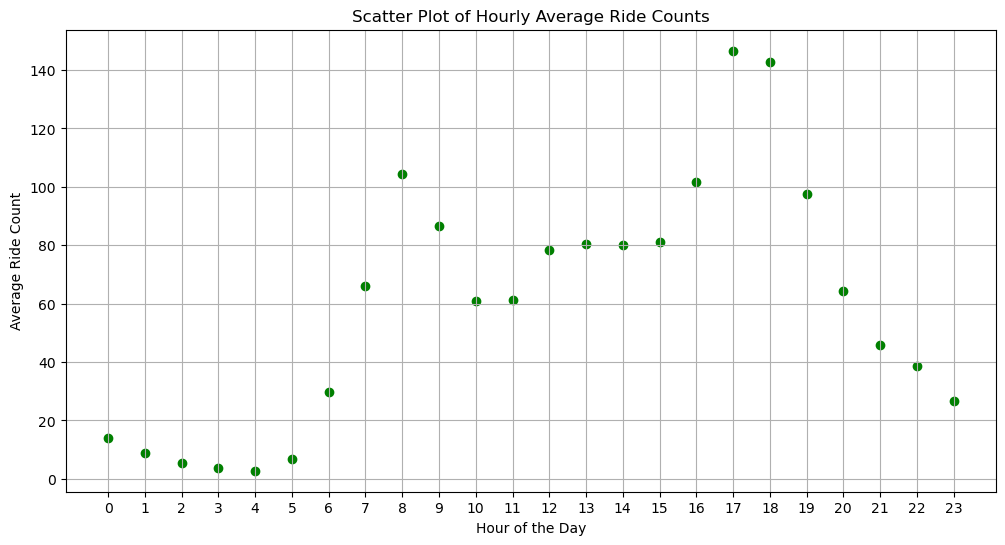

In [26]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(hourly_average.index, hourly_average.values, marker='o', color='green')

# Customize the plot
plt.title('Scatter Plot of Hourly Average Ride Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Ride Count')
plt.xticks(hourly_average.index)  # Set x-axis ticks to match the hours
plt.grid(True)

# Show the plot
plt.show()

In [27]:
# Group by the date part of 'start_time' and calculate the sum of ride counts
day_counts = hourly_counts.groupby(hourly_counts['start_time'].dt.date)['ride_count'].sum()

# Display the total number of rides for each day
print(day_counts)

start_time
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1239
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1228
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: ride_count, dtype: int64


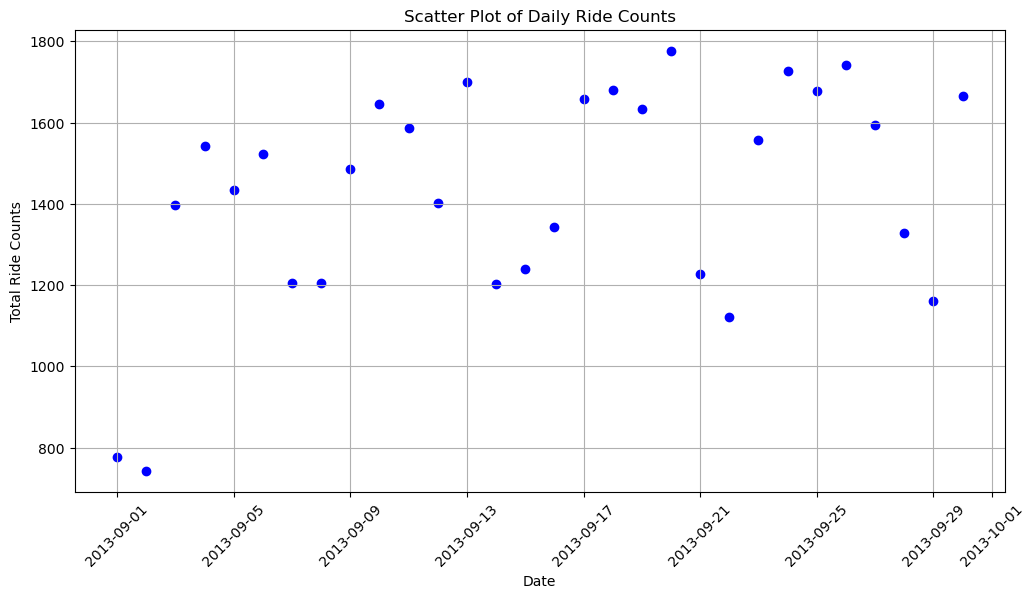

In [28]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(day_counts.index, day_counts.values, marker='o', color='blue')

# Customize the plot
plt.title('Scatter Plot of Daily Ride Counts')
plt.xlabel('Date')
plt.ylabel('Total Ride Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

In [29]:
# Group by 'start_time' and count the number of rides for each hour of each day
day_hour_counts = citi_b.groupby([citi_b['start_time'].dt.date, citi_b['start_time'].dt.hour]).size().unstack(fill_value=0)

# Fill missing hours with 0 rides for each day
all_hours = range(24)
day_hour_counts = day_hour_counts.reindex(columns=all_hours, fill_value=0)

# Display the day_hour_counts DataFrame
day_hour_counts

start_time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_time,,,,,,,,,,,,,,,,,,,,,
2013-09-01,15,12,9,2,3,2,8,5,18,31,...,56,71,63,71,59,47,43,29,31,21
2013-09-02,15,10,7,1,3,2,6,8,16,32,...,23,19,47,72,63,63,36,27,20,27
2013-09-03,5,8,2,0,2,4,38,63,139,91,...,68,59,85,154,149,127,79,60,31,18
2013-09-04,9,7,5,3,1,7,42,98,167,89,...,61,64,98,151,178,119,71,49,49,22
2013-09-05,13,5,2,2,1,4,45,81,110,98,...,69,59,109,151,179,103,64,42,34,31
2013-09-06,13,13,5,3,1,7,22,92,120,104,...,88,67,141,186,145,93,58,34,46,29
2013-09-07,21,15,5,7,5,8,6,10,33,53,...,82,99,98,95,84,76,49,40,47,33
2013-09-08,30,16,9,5,7,0,5,13,27,39,...,101,95,107,96,97,76,58,45,39,19
2013-09-09,11,5,1,2,0,9,41,86,129,98,...,66,75,82,168,155,107,78,69,35,14


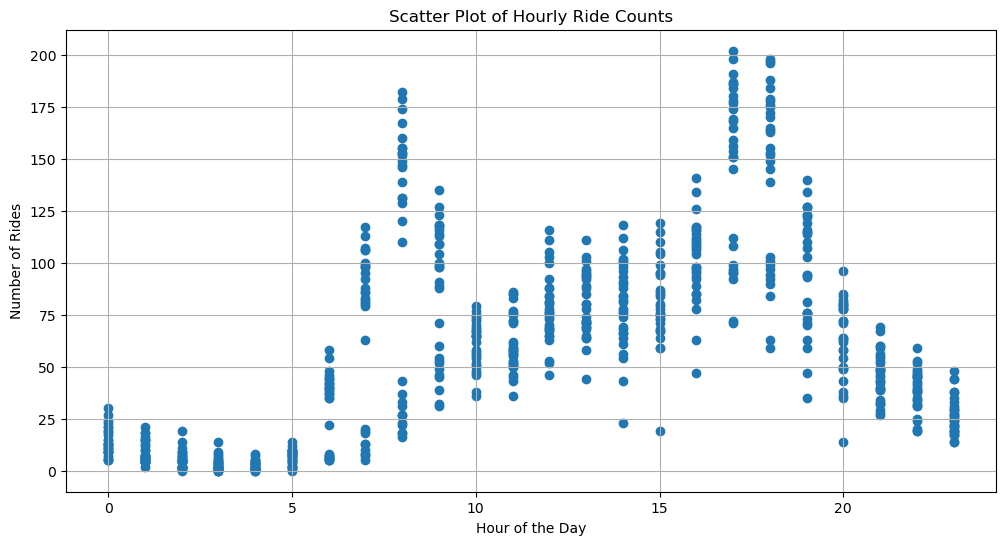

In [30]:
# Create a scatter plot of the day_hour_counts DataFrame

# Flatten the day_hour_counts DataFrame into separate x and y arrays
hours = day_hour_counts.columns.to_list()
y = day_hour_counts.values.flatten()

# Create an array of x values repeating hours for each day
days = day_hour_counts.index
x = np.tile(hours, len(days))

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x, y, marker='o')

# Customize the plot
plt.title('Scatter Plot of Hourly Ride Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.grid(True)

# Show the plot
plt.show()

## 05. State your hypothesis in a markdown cell within your Jupyter notebook.

### Null Hypothesis (H0): There is no significant difference in usage patterns between different days of the week.

### Alternative Hypothesis (H1): There is a significant difference in usage patterns between different days of the week.

In [31]:
# Create a scatterplot using matplotlib for another test between variables

citi.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip length vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

NameError: name 'citi' is not defined

In [32]:
ride_count = pd.get_dummies(citi_b, columns=['days_of_the_week', 'start_hour'], drop_first=True)

In [33]:
ride_count

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,...,start_hour_22:00,start_hour_23:00,start_hour_2:00,start_hour_3:00,start_hour_4:00,start_hour_5:00,start_hour_6:00,start_hour_7:00,start_hour_8:00,start_hour_9:00
0,W 38 St & 8 Ave,40.754666,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,...,0,0,0,0,0,0,0,0,0,0
1,Lispenard St & Broadway,40.719392,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,...,0,0,0,0,0,0,0,0,0,0
2,9 Ave & W 45 St,40.760193,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,...,0,0,0,0,0,0,0,0,0,0
3,E 33 St & 1 Ave,40.743156,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,...,0,0,0,0,0,0,0,0,0,0
4,Lafayette St & E 8 St,40.730287,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,W 21 St & 6 Ave,40.741740,-73.994156,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,Male,...,0,0,0,0,0,0,0,0,0,0
42989,Spruce St & Nassau St,40.711464,-74.005524,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,Male,...,0,0,0,0,0,0,0,0,0,0
42990,Johnson St & Gold St,40.694749,-73.983625,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,Female,...,0,0,0,0,0,0,0,0,0,0
42991,Broadway & E 22 St,40.740343,-73.989551,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,Female,...,0,0,0,0,0,0,0,0,0,0


In [34]:
ride_count.columns

Index(['start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'start_date', 'end_date', 'end_hour', 'start_time',
       'days_of_the_week_Mon', 'days_of_the_week_Sat', 'days_of_the_week_Sun',
       'days_of_the_week_Thu', 'days_of_the_week_Tue', 'days_of_the_week_Wed',
       'start_hour_10:00', 'start_hour_11:00', 'start_hour_12:00',
       'start_hour_13:00', 'start_hour_14:00', 'start_hour_15:00',
       'start_hour_16:00', 'start_hour_17:00', 'start_hour_18:00',
       'start_hour_19:00', 'start_hour_1:00', 'start_hour_20:00',
       'start_hour_21:00', 'start_hour_22:00', 'start_hour_23:00',
       'start_hour_2:00', 'start_hour_3:00', 'start_hour_4:00',
       'start_hour_5:00', 'start_hour_6:00', 'start_hour_7:00',
       'start_hour_8:00', 'start_hour_9:00'],
      dtype='object')

In [35]:
# rides per hour count
rides_per_hour = citi_b.groupby('start_hour').size()

In [36]:
# amount of rides taken per hour of each day
hour_counts = citi_b.groupby('start_hour')['start_date'].count()

In [37]:
hour_counts

start_hour
0:00      420
10:00    1827
11:00    1841
12:00    2353
13:00    2408
14:00    2401
15:00    2436
16:00    3046
17:00    4398
18:00    4280
19:00    2930
1:00      266
20:00    1932
21:00    1371
22:00    1159
23:00     803
2:00      162
3:00       96
4:00       75
5:00      195
6:00      889
7:00     1980
8:00     3127
9:00     2598
Name: start_date, dtype: int64

In [38]:
# Convert 'start_time' column to datetime if it's not already
citi_b['start_time'] = pd.to_datetime(citi_b['start_time'])

# Extract the hour from the 'start_time' column and create a new column 'start_hour'
citi_b['start_hour'] = citi_b['start_time'].dt.hour

# Group by 'start_hour', calculate the count of rides and the average trip duration per hour
hourly_aggregated = citi_b.groupby('start_hour').agg({'trip_duration': 'mean', 'start_time': 'count'}).reset_index()

# Rename columns for clarity
hourly_aggregated.rename(columns={'start_time': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

# Print or plot the results
print(hourly_aggregated)


    start_hour  avg_trip_duration  ride_count
0            0         748.716667         420
1            1         702.657895         266
2            2         659.561728         162
3            3         687.020833          96
4            4         667.106667          75
5            5         605.348718         195
6            6         648.613048         889
7            7         727.038384        1980
8            8         756.595459        3127
9            9         728.346035        2598
10          10         745.684729        1827
11          11         760.065182        1841
12          12         732.083723        2353
13          13         748.196844        2408
14          14         788.499792        2401
15          15         784.350575        2436
16          16         809.883454        3046
17          17         822.308322        4398
18          18         826.911215        4280
19          19         782.310580        2930
20          20         776.412526 

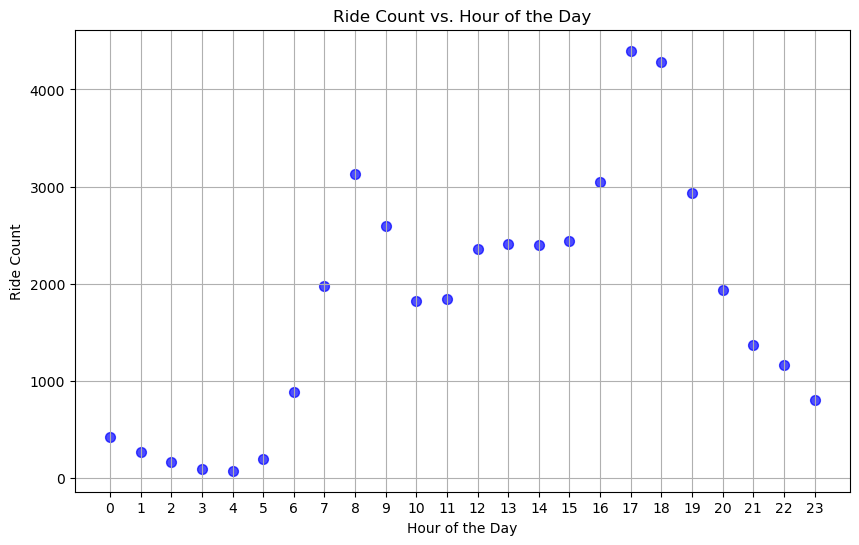

In [39]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hourly_aggregated['start_hour'], hourly_aggregated['ride_count'], s=50, c='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Count')
plt.title('Ride Count vs. Hour of the Day')

# Customize the plot (optional)
plt.grid(True)  # Add gridlines (optional)
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0-23)

# Show the plot
plt.show()


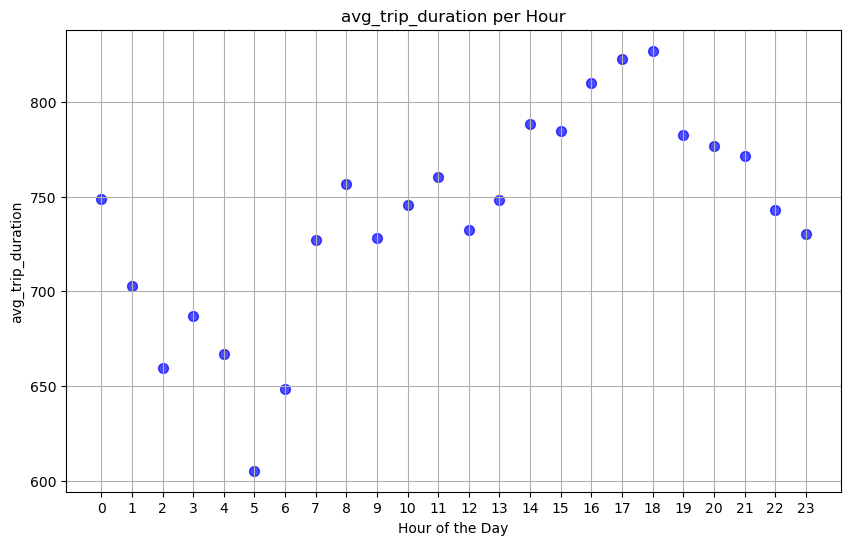

In [40]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hourly_aggregated['start_hour'], hourly_aggregated['avg_trip_duration'], s=50, c='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Hour of the Day')
plt.ylabel('avg_trip_duration')
plt.title('avg_trip_duration per Hour')

# Customize the plot (optional)
plt.grid(True)  # Add gridlines (optional)
plt.xticks(range(24))  # Set x-axis ticks to show all hours (0-23)

# Show the plot
plt.show()

In [41]:
# Calculate the IQR (Interquartile Range) to help indentify busiest hours
Q1 = hourly_aggregated['ride_count'].quantile(0.25)
Q3 = hourly_aggregated['ride_count'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [start_hour, avg_trip_duration, ride_count]
Index: []


In [42]:
# Calculate the IQR (Interquartile Range) to help indentify busiest hours
Q1 = hourly_aggregated['avg_trip_duration'].quantile(0.25)
Q3 = hourly_aggregated['avg_trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

# Print the outliers
print("Outliers_1:")
print(outliers_1)

Outliers_1:
   start_hour  avg_trip_duration  ride_count
5           5         605.348718         195


In [43]:
# Calculate the IQR (Interquartile Range) of trip_duration in citi_b
Q1 = citi_b['trip_duration'].quantile(0.25)
Q3 = citi_b['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5  # You can adjust this threshold as needed

# Find the lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers
outliers_2 = citi_b[(citi_b['trip_duration'] < lower_bound) | (citi_b['trip_duration'] > upper_bound)]

# Print the outliers
print("Outliers_2:")
print(outliers_2)

Outliers_2:
      days_of_the_week  start_hour          start_station_name  \
27                 Thu          16     Grand St & Havemeyer St   
55                 Wed          17          Broadway & W 53 St   
179                Mon          14  Columbia St & Rivington St   
183                Tue          10         Clark St & Henry St   
197                Thu          17      Central Park S & 6 Ave   
...                ...         ...                         ...   
42837              Sun          18            W 37 St & 10 Ave   
42902              Tue           7      Concord St & Bridge St   
42903              Sun          16  Flushing Ave & Carlton Ave   
42909              Mon          16             W 45 St & 6 Ave   
42969              Wed           8          Broadway & W 53 St   

       start_station_latitude  start_station_longitude  \
27                  40.712868               -73.956981   
55                  40.763441               -73.982681   
179                 4

In [44]:
citi_b.shape

(42993, 16)

In [45]:
outliers_2.shape

(1976, 16)

In [46]:
# Filter out the outliers
citi_b_no_outliers = citi_b[(citi_b['trip_duration'] >= lower_bound) & (citi_b['trip_duration'] <= upper_bound)]

In [47]:
citi_b_no_outliers.shape

(41017, 16)

### Doing more possible test to proof hypothesis 

In [48]:
# Convert 'start_date' to datetime
citi_b['start_date'] = pd.to_datetime(citi_b['start_date'])

# Group by 'days_of_the_week' and count the occurrences
day_counts = citi_b.groupby('days_of_the_week').size().reset_index(name='count')

# Optionally, you can set 'days_of_the_week' as the index
day_counts.set_index('days_of_the_week', inplace=True)

# Print the resulting day_counts DataFrame
print(day_counts)

                  count
days_of_the_week       
Fri                6594
Mon                6797
Sat                4965
Sun                5506
Thu                6212
Tue                6429
Wed                6490


In [49]:
daily_aggregated = citi_b.groupby('days_of_the_week').agg({
    'start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

daily_aggregated.rename(columns={'start_date': 'ride_counts', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [50]:
daily_aggregated

,days_of_the_week,ride_counts,avg_trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


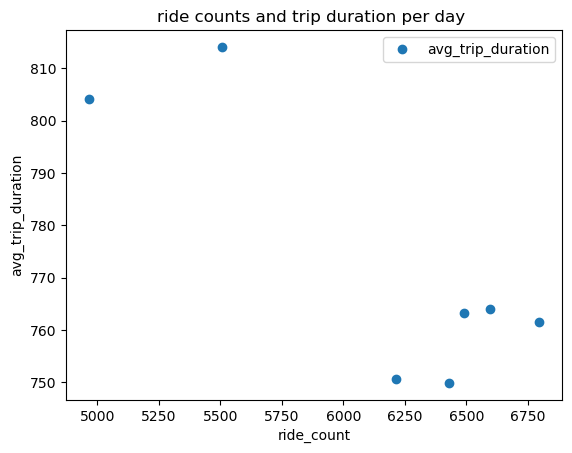

In [51]:
# Create a scatter plot for daily_aggregated

daily_aggregated.plot(x = 'ride_counts', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and trip duration per day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

## 06. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [52]:
# Assuming you have the daily_aggregated DataFrame

X = daily_aggregated['ride_counts'].to_numpy()
y = daily_aggregated['avg_trip_duration'].to_numpy()

# Now 'X' and 'y' are NumPy arrays

In [53]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9

In [54]:

y

array([764.06172278, 761.58555245, 804.03504532, 814.10770069,
       750.65663232, 749.88645201, 763.15362096])

## 07. Split the data into two sets: a training set and a test set.

In [55]:
# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter determines the proportion of data to allocate to the test set.
# The 'random_state' parameter ensures reproducibility by fixing the random seed.

# Now there are four arrays: X_train, X_test, y_train, and y_test.
# X_train and y_train are the training data and labels.
# X_test and y_test are test data and labels.

## 08. Run a linear regression on the data.
### First, fit the model you created to the training set.
### Then, create a prediction for y on the test set.

In [56]:
# Create a LinearRegression model
model = LinearRegression()

# Reshape X_train and y_train to be two-dimensional
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Reshape X_test to be two-dimensional
X_test = X_test.reshape(-1, 1)

# Predict y values for the test set
y_pred = model.predict(X_test)

## 09. Create a plot that shows the regression line on the test set.

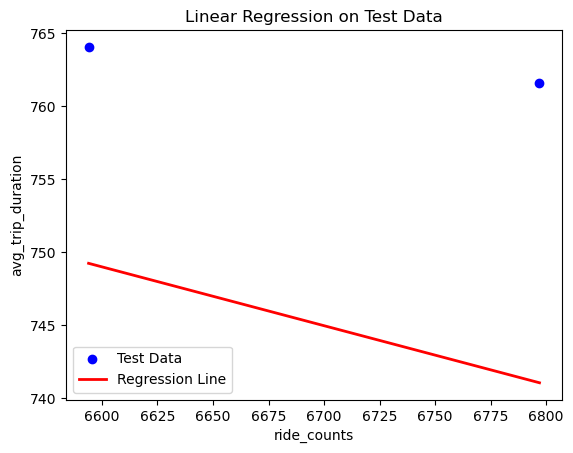

In [57]:
# Scatter plot of the test set
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel('ride_counts')
plt.ylabel('avg_trip_duration')
plt.title('Linear Regression on Test Data')

# Show legend
plt.legend()

# Show the plot
plt.show()


## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### The regression line shows a negative regression and indicates an inverse relationship between the two variables being plotted.

## 11. Check the model performance statistics—MSE and R2 score.

In [58]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 320.08105679433334
R-squared (R2) Score: -207.81367322639673


## 12. Compare the predicted y values with the actual y values in a dataframe.

In [59]:
# Reshape the arrays to have a single column
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_df.head()

,Actual,Predicted
0,764.061723,749.247606
1,761.585552,741.074481


## Interpreting the results:

- The predicted values do not closely match the actual values, which implies weak linear relationship between the "Actual" and "Predicted" columns.

- Also, from Mean Squared Error (MSE) and R-squared (R2), a higher MSE and a lower R2 can be observed hence indicate poor model performance.

## 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
#### Include any reflections you have on the impact of possible data bias.


Model Performance on the Test Set:
The model's performance on the test set does not appear to be very strong. This conclusion is based on the following observations:

Comparison of Actual vs. Predicted Values: When comparing the actual ride duration values with the predicted values, we observe that they do not closely align. There seems to be a significant amount of variability in the predictions, which indicates a weak linear relationship between the two. This suggests that the model might not be capturing all the underlying patterns in the data.

Mean Squared Error (MSE): The higher Mean Squared Error (MSE) value further confirms that the model's predictions deviate significantly from the actual values. A high MSE implies that the model's predictions are, on average, far from the true values. This is not desirable, as we aim for a lower MSE in regression tasks.

R-squared (R2): The lower R-squared (R2) score reinforces the notion of poor model performance. R2 measures the proportion of the variance in the dependent variable (ride duration) that is predictable from the independent variable (ride counts). A lower R2 suggests that the model explains very little of the variance in the data, indicating that it might not be suitable for predicting ride duration based on ride counts.

#### Include any reflections you have on the impact of possible data bias.

1. The data used for model training is not representative of the entire population of bike rides, which can lead to bias.

2. The choice of features (independent variables) may lead to bias.

3. Probably, the dataset did not capture temporal changes adequately, which could have resulted to biased model.



In [60]:
# Exporting new dataset

citi_b.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_b.csv')) 